In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

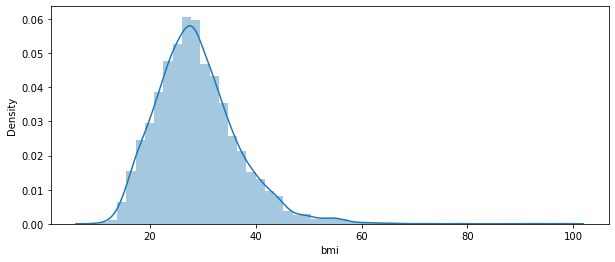

In [5]:
figure, ax = plt.subplots(figsize = (10,4))
sns.distplot(dataset.bmi)

In [6]:
dataset1 = dataset.dropna()

In [7]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

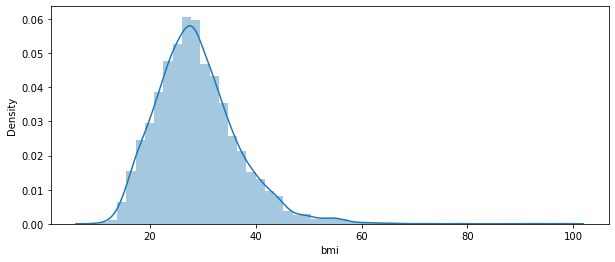

In [8]:
figure, ax = plt.subplots(figsize = (10,4))
sns.distplot(dataset1.bmi)

In [9]:
dataset1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

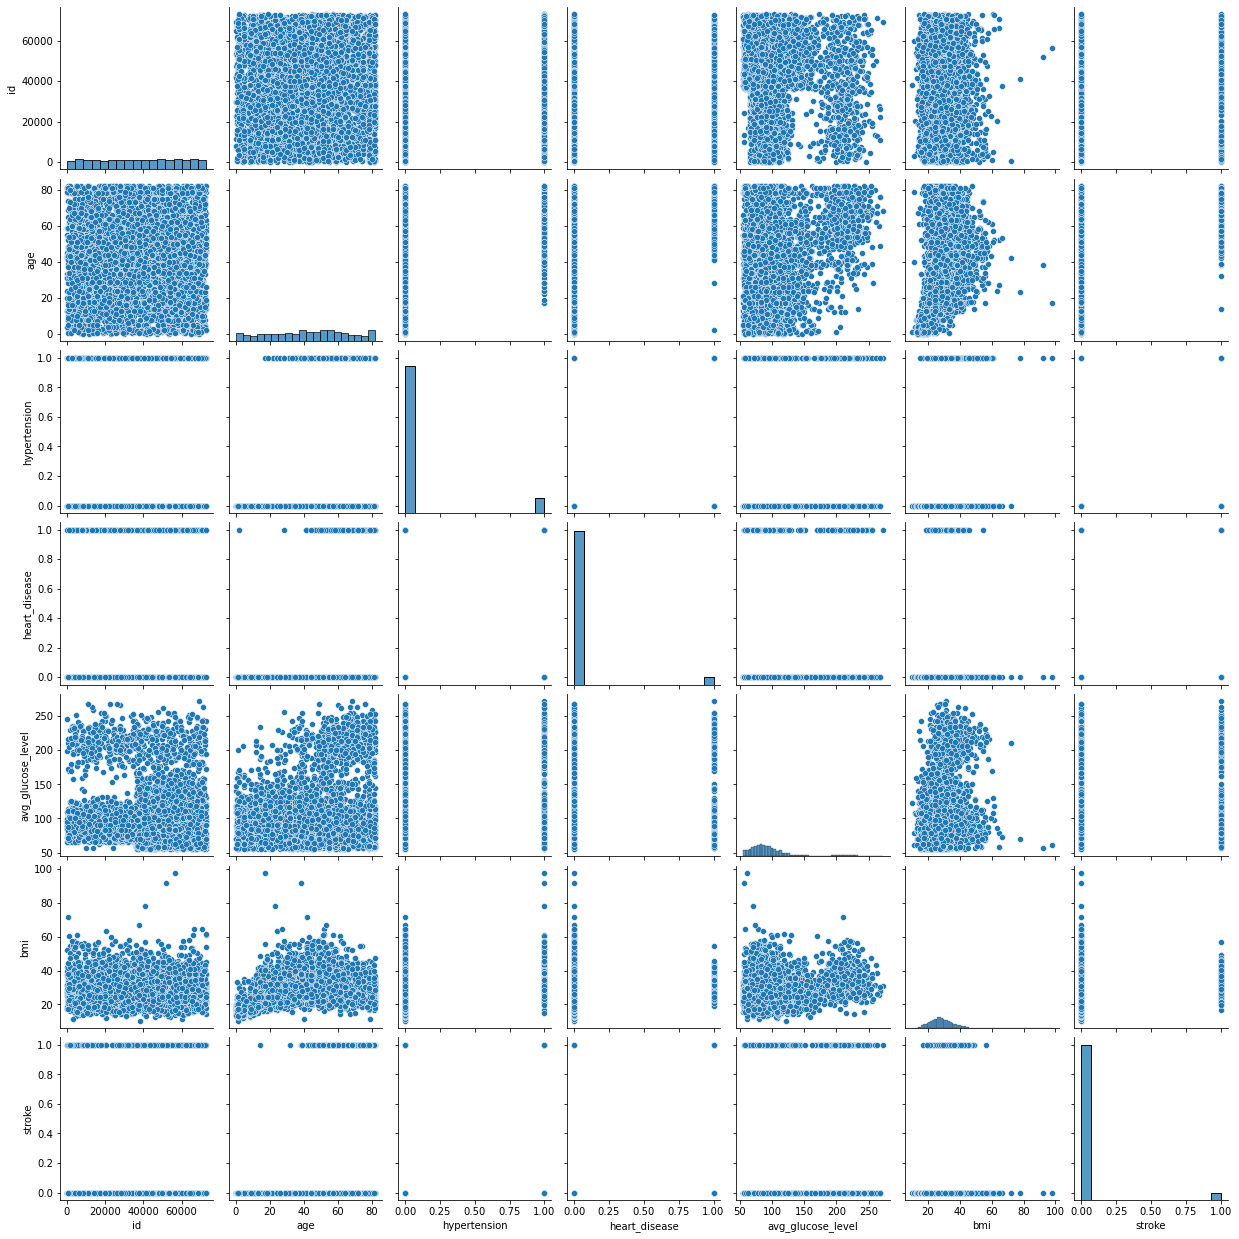

In [10]:
sns.pairplot(dataset1)

<AxesSubplot:>

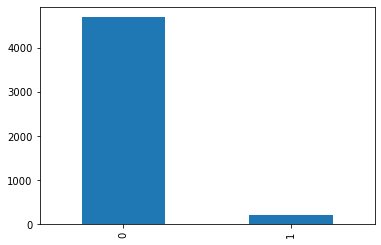

In [11]:
dataset1['stroke'].value_counts().plot(kind='bar')

In [10]:
dataset2 = dataset1.replace(['smokes','formerly smoked'],'smoked')

In [11]:
dataset2['smoking_status'].unique()

array(['smoked', 'never smoked', 'Unknown'], dtype=object)

In [12]:
dataset3 = dataset2.replace(['never smoked','Unknown'],'never-smoked')

In [13]:
dataset3['smoking_status'].unique()

array(['smoked', 'never-smoked'], dtype=object)

In [14]:
categorical = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
final = pd.get_dummies(dataset3, columns=categorical)

In [15]:
final.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_never-smoked,smoking_status_smoked
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,...,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575,0.590141,0.409656,0.000204,...,0.652679,0.128336,0.004482,0.572622,0.157873,0.136688,0.492768,0.507232,0.679364,0.320636
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917,0.491858,0.491820,0.014273,...,0.476167,0.334497,0.066801,0.494748,0.364659,0.343552,0.499999,0.499999,0.466768,0.466768
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4909 non-null   int64  
 1   age                          4909 non-null   float64
 2   hypertension                 4909 non-null   int64  
 3   heart_disease                4909 non-null   int64  
 4   avg_glucose_level            4909 non-null   float64
 5   bmi                          4909 non-null   float64
 6   stroke                       4909 non-null   int64  
 7   gender_Female                4909 non-null   uint8  
 8   gender_Male                  4909 non-null   uint8  
 9   gender_Other                 4909 non-null   uint8  
 10  ever_married_No              4909 non-null   uint8  
 11  ever_married_Yes             4909 non-null   uint8  
 12  work_type_Govt_job           4909 non-null   uint8  
 13  work_type_Never_wo

In [17]:
X = final.drop(['stroke','id'],axis=1)
Y = final['stroke']

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=1)

In [36]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier 
import math

knn = KNeighborsClassifier(p=2)
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, scoring='accuracy', cv = 10)
  

grid_search = grid.fit(X_train, Y_train)

best_parameters = grid_search.best_params_
print(best_parameters)

best_result = grid_search.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

{'n_neighbors': 12}
0.9575106786900808


In [35]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier 
import math

knn = KNeighborsClassifier(p=2)
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, scoring='recall', cv = 10)
  

grid_search = grid.fit(X_train, Y_train)

best_parameters = grid_search.best_params_
print(best_parameters)

best_result = grid_search.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

{'n_neighbors': 1}
0.10809523809523809


In [39]:
from sklearn.metrics import recall_score,accuracy_score

knn_classifier = Pipeline([
      ('balancing', SMOTE(random_state = 101)),
      ('classification', KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean'))
])

knn_classifier.fit(X_train,Y_train)

Y_predict2 = knn_classifier.predict(X_test)

recall_k= recall_score(Y_test,Y_predict2)
print(recall_k)

accuracy_k = accuracy_score(Y_test,Y_predict2)
print(accuracy_k)

0.42857142857142855
0.8336727766463


In [40]:
input_data = ([[38.00,0,0,81.28,33.2,1,0,0,0,1,0,0,1,0,0,1,0,0,1]])


input_data_numpy_array = np.asarray(input_data)

reshape_input_data = input_data_numpy_array.reshape(1,-1)

prediction = knn_classifier.predict(reshape_input_data)

print(prediction)

if(prediction[0]==0):
  print('Less')
else:
  print('More')

[0]
Less


In [42]:
import pickle
# open a file, where you ant to store the data
file = open('KNeighbors_Classifier1.pkl', 'wb')


# dump information to that file
pickle.dump(knn_classifier, file)